# Import Modules

In [1]:
import torch 
import torch.utils.data as Data
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
%matplotlib
import matplotlib.pyplot as plt 


Using matplotlib backend: Qt5Agg


# Movan Python P11, Regression 回归

In [29]:
# 数据存在维度 中括号数量决定 而非真实数据量
# pytorch 中只能处理二维数据， 所以用unsqueeze （现在似乎可以处理一维数据了）
# Note: 现在已经弃用Variable
x=torch.unsqueeze(torch.linspace(-1,1,1000), dim=1)  

y=x.pow(2)+0.1*torch.normal(torch.zeros(*x.size()))

LR=0.01
BATCH_SIZE=32
EPOCH=12

# plt.scatter(x,y)
# plt.show()

plt.ion()  # 实时打印
plt.show()


# torch_dataset=Data.TensorDataset(x,y)
# print(torch_dataset)
# loader=Data.DataLoader(torch_dataset, batch_size=BATCH_SIZE, shuffle=True)

# 用Class定义Neural Network， 并且继承torch.nn.Module(官方用法)
# Constructor 起始结构：
# def __init__(): 
#     super(Net,self).__init__()
# 两个function 最重要: __init__(), forward()
class Net(torch.nn.Module):
    # __init__(): 初始化神经网络，定义，类似构图过程
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # 两个参数，多少个输入feature，多少个输出feature
        # 隐藏层
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        # 输出层
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    # forward() 才是正式搭建神经网络
    def forward(self, x):
        # 构建激励函数， 输入隐藏曾， 将区线弯曲
        x=F.relu(self.hidden(x))   
        
        x=self.predict(x)          # input the output from first layer to the second layer. 
        return x
# RMSprop, Momentum, Adam all better than SGD

net = Net(1,30,1)
print(net)
# 许多默认参数，已经在Network定义时进行了初始化。 
# Learning rate, 类似simulation 里的 timestep,
optimizer = torch.optim.SGD(net.parameters(), lr=0.5);   # 直接对net.parameters进行操作
loss_func = torch.nn.MSELoss();
for t in range(300):
    prediction = net(x)
    # 格式就是prediction在前，真实值在后
    loss = loss_func(prediction, y)
    # 每次梯度归零
    # Gradient, 本质是导数， Loss function的微分
    optimizer.zero_grad()
    # 误差反向传递, 类似直接修改Net的loss 方便之后optimizer优化Net参数
    loss.backward()
    optimizer.step()
    if t%5 == 0:
        plt.cla()
        plt.scatter(x,y)
        plt.plot(x, prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'loss=%.4f' % loss.data)
        plt.pause(0.1)
    if t%100 ==0:
        print(t,"th training ","Loss of the data", loss.data)
plt.ioff()
plt.show()
optimizer = torch.optim.SGD(net.parameters(), lr=0.02);   # 直接对net.parameters进行操作
loss_func = torch.nn.CrossEntropyLoss();  # 交叉熵， 计算softmax， 所有概率元素加起来等于1


    

Net(
  (hidden): Linear(in_features=1, out_features=30, bias=True)
  (predict): Linear(in_features=30, out_features=1, bias=True)
)
0 th training  Loss of the data tensor(0.3190)
100 th training  Loss of the data tensor(0.0121)
200 th training  Loss of the data tensor(0.0111)


# P12, Classification

In [42]:
import torch
import matplotlib.pyplot as plt
%matplotlib
import torch.nn.functional as F
import numpy as np
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)

x = torch.cat((x0, x1) , 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), ).type(torch.LongTensor)

# plt.scatter(x[:,0],x[:,1], c=y , s=100, lw=0, cmap = "RdYlGn")
# plt.show()
class Net(torch.nn.Module):
    # __init__(): 初始化神经网络，定义，类似构图过程
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # 两个参数，多少个输入feature，多少个输出feature
        # 隐藏层
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        # 输出层
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    # forward() 才是正式搭建神经网络
    def forward(self, x):
        # 构建激励函数， 输入隐藏曾， 将区线弯曲
        x=F.relu(self.hidden(x))   
        
        x=self.predict(x)          # input the output from first layer to the second layer. 
        return x
net=Net(2,20,2)
print(net)
plt.ion()
plt.show()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.05)
loss_func=torch.nn.CrossEntropyLoss()

for t in range(100):
    # 输出一个列表，各项加和并不为1， 要通过softmax转化成概率
    out = net(x)
    loss = loss_func(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t%2==0:
        plt.cla()
        prediction = torch.max(F.softmax(out, dim=1) ,1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.numpy(); 
        plt.scatter(x[:,0], x[:,1], c=prediction)
        accuracy  = np.sum(pred_y == target_y) / len(target_y)
#         print(accuracy)
        plt.text(1.5, -4, "Accuracy = %.2f"%accuracy)
        plt.pause(0.1)
plt.ioff()
plt.show()


Using matplotlib backend: Qt5Agg
Net(
  (hidden): Linear(in_features=2, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=2, bias=True)
)


# P13, 快速搭建法

In [46]:
# 类首字母用大写， function用小写
# 自动对parameters进行优化

net2 = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,2)
)
print(net2)


Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


# P14， 保存提取参数

In [18]:
x=torch.unsqueeze(torch.linspace(-1,1,1000), dim=1)  

y=x.pow(2)+0.1*torch.normal(torch.zeros(*x.size()))

net1 = torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1)
)
optimizer = torch.optim.SGD(net1.parameters(), lr = 0.5)
loss_func = torch.nn.MSELoss()
for t in range(100):
#     print(t)
    prediction = net1(x); 
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(net1)
def save(Network):
    # 保存整个Network
    torch.save(Network, "net.pkl")
    # 保存parameters
    torch.save(Network.state_dict(), "state.pkl")

def restore_net():
    return torch.load("net.pkl")

def restore_params(Network):
    Network.load_state_dict(torch.load("state.pkl"))
    print(Network)
save(net1)

net2 = ""
net2 = restore_net()
print(net2)
restore_params(net2)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


# P15 Mini Batch training: 批训练

In [29]:
import torch
import torch.utils.data as Data

# 如果非batch size的整数倍，最后一个size包含其他未训练的数据
# 如果batch size大于dataset,则只训练一次
BATCH_SIZE = 5

x=torch.linspace(1,10,10)
y=torch.linspace(10,1,10)
# print(x, y)

# 定义数据库，将所有data放进数据库
dataset=Data.TensorDataset(x, y)

loader = Data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
print(dataset)
print(enumerate(loader))

# epoch 总共将数据循环的次数
for epoch in range(3):
    for step, (batch_x, batch_y) in enumerate(loader):
        print("Epoch: ", epoch, "| Step: ", step, " | batch x: ", batch_x.numpy(), " | batch y:",batch_y.numpy())

Epoch:  0 | Step:  0  | batch x:  [ 7.  5. 10.  8.  2.]  | batch y: [4. 6. 1. 3. 9.]
Epoch:  0 | Step:  1  | batch x:  [3. 9. 4. 6. 1.]  | batch y: [ 8.  2.  7.  5. 10.]
Epoch:  1 | Step:  0  | batch x:  [6. 5. 3. 1. 4.]  | batch y: [ 5.  6.  8. 10.  7.]
Epoch:  1 | Step:  1  | batch x:  [ 9.  8.  2. 10.  7.]  | batch y: [2. 3. 9. 1. 4.]
Epoch:  2 | Step:  0  | batch x:  [10.  1.  6.  2.  5.]  | batch y: [ 1. 10.  5.  9.  6.]
Epoch:  2 | Step:  1  | batch x:  [9. 7. 4. 8. 3.]  | batch y: [2. 4. 7. 3. 8.]


# P17， Optimizer, 优化器

In [40]:
# Hypter-parameters, 用大写
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

x=torch.unsqueeze(torch.linspace(-1,1,1000), dim=1)  

y=x.pow(2)+0.1*torch.normal(torch.zeros(*x.size()))

torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = BATCH_SIZE,
    shuffle=True,
)

class Net(torch.nn.Module):
    # __init__(): 初始化神经网络，定义，类似构图过程
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # 两个参数，多少个输入feature，多少个输出feature
        # 一个隐藏层，有20个神经元
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        # 输出层
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    # forward() 才是正式搭建神经网络
    def forward(self, x):
        # 构建激励函数， 输入隐藏曾， 将区线弯曲
        x=F.relu(self.hidden(x))
        x=self.predict(x)          # input the output from first layer to the second layer. 
        return x

net_SGD = Net(1,20,1)
net_Momentum = Net(1,20,1)
net_RMSprop = Net(1,20,1)
net_Adam = Net(1,20,1)
nets=[net_SGD ,net_Momentum , net_RMSprop, net_Adam]

opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers=[opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

# RMSprop, Adam 整体来说比较优秀

loss_func=torch.nn.MSELoss()
Losses=[[],[],[],[]]

for epoch in range(EPOCH):
#     print(epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        for net, opt, l_his in zip(nets, optimizers, Losses):
            output = net(batch_x)
            loss = loss_func(output, batch_y)
            opt.zero_grad(); 
            loss.backward()
            opt.step()
            l_his.append(loss.item())
labels = ["SGD","Momentum", "RMSprop","Adam"]
plt.clf()
for i, l_his in enumerate(Losses):
    plt.plot(l_his, label=labels[i])
plt.legend(loc="best")
plt.show()

# P19. Convolutional neural network (CNN)
1. 先对图片小部分进行处理 （收集一小块像素区域， 整理信息，呈现一些特征）。加强数据的连续性和图片的理解
2. 用前边提取到的边缘信息，进行重复特征提取，总结出更高级的数据结构
3. 然后放入全连接神经网络，进行结果分类

<span>256\*256\*RGB -> 128\*128\*16 -> 64\*64\*64 -> 32\*32\*256 <br></span>
<span>将信息压缩，增高 <br></span>
<span> 比较常用的CNN结构</span>
- Classifier
- Fully Connect 
- Fully Connect
- Max Pooling
- Convolution
- Max Pooling
- Convulution
- Image

In [43]:
print(256*256*4)
print(128*128*16)
print(64*64*64)
print(32*32*256)

262144
262144
262144
262144


In [26]:
import torch
import torch.utils.data as Data
import torch.nn as nn
import torchvision

EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST=False
train_data = torchvision.datasets.MNIST(
    root="./mnist",
    train=True,
    transform = torchvision.transforms.ToTensor(), # (0,1) numpy array # RGB 值从 0-255压缩至(0-1）
    download=DOWNLOAD_MNIST
)
print(train_data.train_data.size())
print(train_data.train_labels.size())
# plt.clf()
# plt.imshow(train_data.train_data[6000].numpy(), cmap="gray")
# plt.show()

train_loader = Data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_data = torchvision.datasets.MNIST(
    root="./mnist",
    train=False
)
# 将 0-255 归一化
test_x = torch.unsqueeze(test_data.data, dim=1).type(torch.FloatTensor)[:2000]/255 
test_y = test_data.targets[:2000]

# print(y[0])

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels  = 1,
                out_channels = 16,   # 卷积核的 深度
                kernel_size = 5,     # 卷积核的 长 和 宽
                stride = 1 ,         # 1 个像素跳跃
                padding = 2 ,       # 边缘补充0， 防止卷积核对图片进行裁切
            ),   # 卷积核 --> (16,28,28)
            nn.ReLU(),   # --> (16,28,28)
            nn.MaxPool2d(kernel_size=2),  # --> (16,14,14) stride 默认等于kernel_size, 所以除以2
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),   # --> (32,14,14) 
            nn.ReLU(),                    # --> (32,14,14) 
            nn.MaxPool2d(kernel_size=2)   # --> (32,7,7)  三维的数据
        )
        
        # 进入Linear层之前要把Convolution层的数据展开成一维
        self.out = nn.Linear(32*7*7, 10)
    def forward(self, x):
        x=self.conv1(x)
        x=self.conv2(x)
        x=x.view(x.size(0), -1)
        output=self.out(x)
        return output, x

    
    
cnn = CNN()
print(cnn)
# for (b_x, b_y) in train_loader:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()
for epoch in range(EPOCH):
    for step, (x,y) in enumerate(train_loader):
        output = cnn(x)[0]
#         print(output)
        loss = loss_func(output, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if step%50 ==0:
            test_output = cnn(test_x)
            pred_y = torch.max(test_output[0],1)[1].data.squeeze()
            accuracy = sum(pred_y == test_y) /test_y.size(0)
            print("Epoch: ", epoch, "| train loss {:.4f}".format(loss.item()), "| test accuracy: {:.2f}".format(accuracy))
            
            

test_output = cnn(test_x[:10])    
pred_y = torch.max(test_output[0], 1)[1].data.numpy().squeeze()
print(pred_y, "prediction number")
print(test_y[:10].numpy(), "read number")

torch.Size([60000, 28, 28])
torch.Size([60000])
CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss 2.3003 | test accuracy: 0.21
Epoch:  0 | train loss 0.3709 | test accuracy: 0.81
Epoch:  0 | train loss 0.3640 | test accuracy: 0.90
Epoch:  0 | train loss 0.1904 | test accuracy: 0.92
Epoch:  0 | train loss 0.1920 | test accuracy: 0.92
Epoch:  0 | train loss 0.1159 | test accuracy: 0.94
Epoch:  0 | train loss 0.1484 | test accuracy: 0.94
Epoch:  0 | train loss 0.3370 | test accuracy: 0.95
Epoch:  0 | train loss 0.3040 | test accuracy: 0.96
Epoch:  0 | 

# P21. Recurrent Neural Network, (RNN) 循环神经网络
普通神经网络因为参数多次反向传递，可能会有梯度爆炸(gradient explosion)和梯度消失(梯度弥散， gradient vanishing)
<span>LSTM 用于解决上述问题，比普通RNN多了输入控制器，输出控制器，和记忆控制器<br></span>
<span>存在全局主线剧情:
- 如果支线剧情对于主线影响巨大，输入控制器会将其重要程度写入剧情
- 如果支线剧情对于主线影响巨大，记忆控制器会将之前部分主线遗忘，并替换新剧情
- 依据主线和支线进行预测
</span>

<span>用 RNN 观看 MNIST 的数字, RNN 输入为一串序列，所以每一行的像素进行一个序列的输入 </span> 


In [27]:
# MNIST 分类问题
# TODO: format of the input data. 
import torch
import torch.utils.data as Data
import torch.nn as nn
import torchvision

EPOCH = 1
BATCH_SIZE = 64
TIME_STEP = 28
INPUT_SIZE = 28
LR = 0.01
DOWNLOAD_MNIST = False

train_data = torchvision.datasets.MNIST(
    root="./mnist",
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=DOWNLOAD_MNIST
)

train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

print(train_loader)

test_data = torchvision.datasets.MNIST(
    root="./mnist",
    train=False,
    transform=torchvision.transforms.ToTensor()    
)
# 将 0-255 归一化
test_x = test_data.test_data.type(torch.FloatTensor)[:2000]/255 
test_y = test_data.test_labels.numpy()[:2000]





class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.LSTM(
            input_size = INPUT_SIZE,   # 每个时间点输入28个像素点
            hidden_size = 64,          # 隐藏层节点个数
            num_layers = 1,            # 隐藏层的层数
            batch_first = True,        # 输入数据中，（batch， time_step, input）batch 在第几个维度. 通常将其放在第一个维度
        )
        # input 为一行28个像素， time step 代表 28 个时间序列， batch带表一个batch
        self.out = nn.Linear(64,10)
    def forward(self, x):
        # h_n 和 h_c 共同代表 hidden state，h_n 代表主线，h_c 代表支线
        r_out, (h_n, h_c) = self.rnn(x, None) 
        out = self.out(r_out[:, -1, :])    # 数据结构为(batch， time step， input)
        return out
    
rnn = RNN()
print(rnn)
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):
        b_x = b_x.view(-1, TIME_STEP, INPUT_SIZE)
        print(b_x.size())
        output = rnn(b_x)
        
        loss = loss_func(output , b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if step%50 == 0:
            test_output = rnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = (pred_y == test_y).astype(int).sum() / test_y.size
            print("Epoch: ", epoch, "| train loss {:.4f}".format(loss.item()), "| test accuracy: {:.2f}".format(accuracy))
            
#         print(x)
        

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)
torch.Size([64, 28, 28])
Epoch:  0 | train loss 2.3090 | test accuracy: 0.09
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 

In [62]:
print(dir(train_loader))

['_DataLoader__initialized', '_DataLoader__multiprocessing_context', '_IterableDataset_len_called', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_auto_collation', '_dataset_kind', '_get_iterator', '_index_sampler', '_iterator', 'batch_sampler', 'batch_size', 'collate_fn', 'dataset', 'drop_last', 'generator', 'multiprocessing_context', 'num_workers', 'persistent_workers', 'pin_memory', 'prefetch_factor', 'sampler', 'timeout', 'worker_init_fn']


torch.Size([60000, 28, 28])
torch.Size([60000])


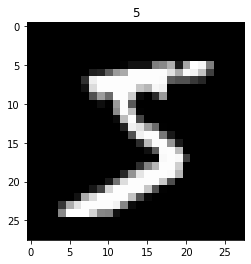

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3047 | test accuracy: 0.19
Epoch:  0 | train loss: 0.8026 | test accuracy: 0.59
Epoch:  0 | train loss: 0.6238 | test accuracy: 0.75
Epoch:  0 | train loss: 0.6579 | test accuracy: 0.83
Epoch:  0 | train loss: 0.5053 | test accuracy: 0.85
Epoch:  0 | train loss: 0.4139 | test accuracy: 0.87
Epoch:  0 | train loss: 0.3088 | test accuracy: 0.90
Epoch:  0 | train loss: 0.2748 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1646 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1640 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1498 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1521 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1171 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0985 | test accuracy: 0.95
Epoch:  0 | train loss: 0.3427 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0276 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1273 | test accurac

In [29]:
import torch
from torch import nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


# torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 64
TIME_STEP = 28          # rnn time step / image height
INPUT_SIZE = 28         # rnn input size / image width
LR = 0.01               # learning rate
DOWNLOAD_MNIST = True   # set to True if haven't download the data


# Mnist digital dataset
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,                         # this is training data
    transform=transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                        # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,            # download it if you don't have it
)

# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

# Data Loader for easy mini-batch return in training
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# convert test data into Variable, pick 2000 samples to speed up testing
test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())
test_x = test_data.test_data.type(torch.FloatTensor)[:2000]/255.   # shape (2000, 28, 28) value in range(0,1)
test_y = test_data.test_labels.numpy()[:2000]    # covert to numpy array


class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=INPUT_SIZE,
            hidden_size=64,         # rnn hidden unit
            num_layers=1,           # number of rnn layer
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )

        self.out = nn.Linear(64, 10)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out


    
    
rnn = RNN()
print(rnn)

optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

# training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):        # gives batch data
        
        b_x = b_x.view(-1, 28, 28)              # reshape x to (batch, time_step, input_size)
#         print(b_x.size())
        output = rnn(b_x)                               # rnn output
        loss = loss_func(output, b_y)                   # cross entropy loss
        optimizer.zero_grad()                           # clear gradients for this training step
        loss.backward()                                 # backpropagation, compute gradients
        optimizer.step()                                # apply gradients

        if step % 50 == 0:
            test_output = rnn(test_x)                   # (samples, time_step, input_size)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y).astype(int).sum()) / float(test_y.size)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

In [10]:
import numpy as np 
a = np.ones((1, 4))
b = np.ones(
    16,
)
print(a)
print(b)
print(a + b[:,np.newaxis])


[[1. 1. 1. 1.]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]
